In [2]:
from qiskit import IBMQ

In [3]:
#The ACCOUNT
#The IBMQ account object has functions for handling administrative tasks

In [4]:
#Delete the accounts exiting in the disk
IBMQ.delete_account()

In [5]:
#Enable your account in the current season
IBMQ.enable_account('83158fa83d295a4256b792eed90ad3696380500c9752858f5693cd5cfa0cc34e5ae82429acc43813fe1222c6cfdb9a5dc5313118c64be9299cff625976ed5835')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
#Save the account on the disk
IBMQ.save_account('83158fa83d295a4256b792eed90ad3696380500c9752858f5693cd5cfa0cc34e5ae82429acc43813fe1222c6cfdb9a5dc5313118c64be9299cff625976ed5835')

configrc.store_credentials:WARNING:2020-06-05 21:30:11,642: Credentials already present. Set overwrite=True to overwrite.


In [8]:
#Disable the account for the current season
IBMQ.disable_account()

In [9]:
#Load the account from the disk
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
#Output a list of the accounts saved in the disk
IBMQ.stored_account()

{'token': '83158fa83d295a4256b792eed90ad3696380500c9752858f5693cd5cfa0cc34e5ae82429acc43813fe1222c6cfdb9a5dc5313118c64be9299cff625976ed5835',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

In [11]:
#Output the account of the current season
IBMQ.active_account()

{'token': '83158fa83d295a4256b792eed90ad3696380500c9752858f5693cd5cfa0cc34e5ae82429acc43813fe1222c6cfdb9a5dc5313118c64be9299cff625976ed5835',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

In [12]:
# THE PROVIDER 
# The backends allowed in my account
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [13]:
# Selecting one
backend = provider.get_backend('ibmq_16_melbourne')
backend

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
# FILTERING THE BACKENDS
# Only real devices:
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
# With more than 5 qb:
provider.backends(filters=lambda x: x.configuration().n_qubits > 5
                                    and not x.configuration().simulator
                                    and x.status().operational==True)

[<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [16]:
# The device with less queue:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
# BACKENDS
# Backends are both simulators and real devices

In [18]:
backend = least_busy(small_devices)
backend.provider()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
backend.name()

'ibmqx2'

In [20]:
backend.status()

In [21]:
backend.configuration()

QasmBackendConfiguration(allow_object_storage=True, allow_q_object=True, backend_name='ibmqx2', backend_version='2.0.5', basis_gates=['u1', 'u2', 'u3', 'cx', 'id'], conditional=False, coupling_map=[[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]], credits_required=True, description='5 qubit device', gates=[GateConfig(id, [], gate id q { U(0,0,0) q; }, [[0], [1], [2], [3], [4]]), GateConfig(u1, ['lambda'], gate u1(lambda) q { U(0,0,lambda) q; }, [[0], [1], [2], [3], [4]]), GateConfig(u2, ['phi', 'lambda'], gate u2(phi,lambda) q { U(pi/2,phi,lambda) q; }, [[0], [1], [2], [3], [4]]), GateConfig(u3, ['theta', 'phi', 'lambda'], gate u3(theta,phi,lambda) q { U(theta,phi,lambda) q; }, [[0], [1], [2], [3], [4]]), GateConfig(cx, [], gate cx q1,q2 { CX q1,q2; }, [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]])], local=False, max_experiments=75, max_shots=8192, meas_map=[[0, 1, 2, 3, 4]], memory=True, 

In [22]:
backend.properties()

BackendProperties(_gates={'id': {(0,): {'gate_error': (0.0006099042273968857, datetime.datetime(2020, 6, 5, 8, 22, 27, tzinfo=tzutc())), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 6, 5, 8, 54, 40, tzinfo=tzutc()))}, (1,): {'gate_error': (0.0005977724873576851, datetime.datetime(2020, 6, 5, 8, 23, 49, tzinfo=tzutc())), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 6, 5, 8, 54, 40, tzinfo=tzutc()))}, (2,): {'gate_error': (0.0008293974552390407, datetime.datetime(2020, 6, 5, 8, 25, 10, tzinfo=tzutc())), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 6, 5, 8, 54, 40, tzinfo=tzutc()))}, (3,): {'gate_error': (0.0005773531450810135, datetime.datetime(2020, 6, 5, 8, 26, 34, tzinfo=tzutc())), 'gate_length': (3.555555555555556e-08, datetime.datetime(2020, 6, 5, 8, 54, 40, tzinfo=tzutc()))}, (4,): {'gate_error': (0.000783828065289456, datetime.datetime(2020, 6, 5, 8, 27, 57, tzinfo=tzutc())), 'gate_length': (3.555555555555556e-08, datetime.date

In [23]:
# JOBS
# To see the last 5 jobs:
for ran_job in backend.jobs(limit=5):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))

5ddd9fa7329c820012d88771 JobStatus.CANCELLED


In [26]:
# A job can be retrieved with his id
job = backend.retrieve_job(ran_job.job_id())
job

IBMQJob(_api=<qiskit.providers.ibmq.api.clients.account.AccountClient object at 0x0000023487EBD788>, _api_status='CANCELLED', _backend=<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, _backend_info={'id': '5ae875670f020500393162da', 'name': 'ibmqx2'}, _cancelled=False, _creation_date=datetime.datetime(2019, 11, 26, 21, 56, 55, 216000, tzinfo=tzutc()), _error=None, _job_error_msg=None, _job_id='5ddd9fa7329c820012d88771', _kind=<ApiJobKind.QOBJECT_STORAGE: 'q-object-external-storage'>, _name=None, _qobj=None, _queue_info=None, _result=None, _run_mode=None, _status=<JobStatus.CANCELLED: 'job has been cancelled'>, _tags=[], _time_per_step={'CREATING': '2019-11-26T21:56:55.224Z', 'CREATED': '2019-11-26T21:56:56.970Z', 'VALIDATING': '2019-11-26T21:56:56.996Z', 'VALIDATED': '2019-11-26T21:56:57.729Z', 'RUNNING': '2019-11-26T21:56:57.804Z', 'WORKING_IN_PROGRESS': '2019-11-26T21:56:57.795Z', 'CANCELLED': '2019-11-26T22:10:04.501Z'}, _use_object_storage=True, allow_o

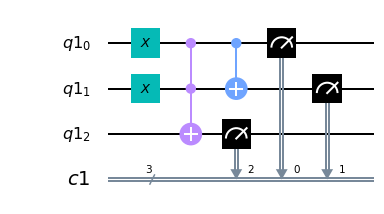

In [28]:
from qiskit import *
from qiskit.compiler import transpile, assemble
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw(output = 'mpl')

In [32]:
# Functions to map the circuit and package it
job = execute(circuit, backend)
mapa = assemble(mapped_circuit, backend=backend, shots=1024)
job = backend.run(qobj)

In [34]:
from qiskit.providers.ibmq.managed import IBMQJobManager

sim_backend = provider.get_backend('ibmq_qasm_simulator')
# Prepare a set of circuits
circs = []
for _ in range(20):
    circs.append(circuit)
circs = transpile(circs, backend=sim_backend)

# Submit them all to the backend
job_manager = IBMQJobManager()
job_set_foo = job_manager.run(circs, backend=sim_backend, name='foo')

C:\Users\Adrián\AppData\Roaming\Python\Python37\site-packages\qiskit\providers\ibmq\managed\managedjob.py:132: UserWarning: Unable to submit job for experiments 0-19: 'Error submitting job: \'(\\\'Connection aborted.\\\', OSError("(10054, \\\'WSAECONNRESET\\\')"))\''
  self.start_index, self.end_index, err))


In [35]:
print(job_set_foo.report())

Job set name: foo
          ID: c92194329d3a4fa5aaa26d579c12d502-15913879873880587
        tags: []
Summary report:
       Total jobs: 1
  Successful jobs: 0
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-19
    job index: 0
    status: job submit failed: 'Error submitting job: \'(\\\'Connection aborted.\\\', OSError("(10054, \\\'WSAECONNRESET\\\')"))\''


In [36]:
# Submit them all to the backend
job_set_bar = job_manager.run(circs, backend=sim_backend, name='bar', max_experiments_per_job=10)

In [37]:
print(job_set_bar.report())

Job set name: bar
          ID: 29c76a4e87bf4c4184e22625b51c225b-15913880368663168
        tags: []
Summary report:
       Total jobs: 2
  Successful jobs: 2
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-9
    job index: 0
    job ID: 5edaa787304e3100139f8171
    name: bar_0_
    status: job has successfully run
  experiments: 10-19
    job index: 1
    job ID: 5edaa78a23d04600136961ff
    name: bar_1_
    status: job has successfully run


In [38]:
results = job_set_bar.results()
print("This is the histogram data for experiment 5: {}".format(results.get_counts(5)))
print("This is the histogram data for experiment 15: {}".format(results.get_counts(15)))

This is the histogram data for experiment 5: {'101': 1024}
This is the histogram data for experiment 15: {'101': 1024}


In [33]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright